In [90]:
# ## The Goal of this book is to create a table of school information from
# # the Michigan High School Athletic Association (MHSAA) website.

# # This is an example of the URL that we will be scraping:
# examp_url = 'https://my.mhsaa.com/DesktopModules/MHSAA-Endpoint/handlers/SchoolInfo.ashx?method=SchoolDetails&SchoolId=4003'

# # This url retuns a JSON
# # The four digit school ID number is the only thing that changes in the URL.

# # I want to create a dataframe of all of the schools I can find. They will be indexed by SchoolId

# ## This an example of what the jsons will look like:
# {"SchoolId":4003,"SportId":0,"PopularName":"Lansing Catholic","ProperName":"Lansing Catholic HS","NickName":"Cougars","Colors":"Columbia Blue & Silver","LeaugeName":"Capital Area Activities Conference","LeaugeId":6899,"HeadCoach":null,"PrimaryColorCode":"#003366","ImagePath":"mhsaasize/2435.png","Classification":"B","Record":null,"Enrollment":423,"City":"Lansing","State":"MI","Address1":"501 N Marshall","Address2":null,"Zip":"48912","Phone":"(517) 267-2113","Fax":"(517) 267-2135","VanityUrl":"lansingcatholic","MapURL":"https://maps.google.com/maps?q=Lansing Catholic+501 N Marshall++Lansing, MI, 48912","WebSite":"http://www.lansingcatholic.org/","IsMiddleSchool":false,"ClassificationCalculationSteps":[],"ClassificationCalculationStepsHtml":"<table class=\"TabularData\" ><tbody><tr><th width=\"55\">Grade</th><th width=\"35\">Boys</th><th width=\"35\">Girls</th><th width=\"40\">Total</th><th></th></tr><tr><td colspan=\"4\"></td><td rowspan=\"10\" class=\"calculationColumn\">Classification size is 423.</td></tr><tr><td>9</td><td>59</td><td>42</td><td>101</td></tr><tr><td>10</td><td>40</td><td>57</td><td>97</td></tr><tr><td>11</td><td>63</td><td>56</td><td>119</td></tr><tr><td>12</td><td>55</td><td>51</td><td>106</td></tr><tr><td>Other programs draw</td><td>0</td><td>0</td><td>0</td></tr></tbody></table>","SportSeasonId":0,"EnrollmentData":[{"GradeDisplay":"9","GradeTypeCode":9,"BoysCount":59,"GirlsCount":42,"CombinedCount":101},{"GradeDisplay":"10","GradeTypeCode":10,"BoysCount":40,"GirlsCount":57,"CombinedCount":97},{"GradeDisplay":"11","GradeTypeCode":11,"BoysCount":63,"GirlsCount":56,"CombinedCount":119},{"GradeDisplay":"12","GradeTypeCode":12,"BoysCount":55,"GirlsCount":51,"CombinedCount":106},{"GradeDisplay":"Other programs draw","GradeTypeCode":20,"BoysCount":0,"GirlsCount":0,"CombinedCount":0}],"TicketUrl":"https://gofan.co/app/school/MI4125","OldSchoolId":2435,"SchoolNameWithId":"Lansing Catholic (2435)"}


# # I want all of the unique data from each school to be stored
# # I want it all collected into a single dataframe and table that can be saved as a csv



In [105]:
import requests
import pandas as pd
from tqdm import tqdm
import time
import json

# Start of school IDs
school_id_start = 0000
# End of school IDs
school_id_end = 9999

# Base URL
base_url = 'https://my.mhsaa.com/DesktopModules/MHSAA-Endpoint/handlers/SchoolInfo.ashx?method=SchoolDetails&SchoolId='

# Initialize a timer for the total execution time
total_start_time = time.time()

# Prepare an empty list to store the school data
school_data = []

# Loop over the school IDs
for school_id in tqdm(range(school_id_start, school_id_end+1), desc="Processing Schools"):
    # Build the URL for the current school ID
    url = base_url + str(school_id)
    # Send a GET request to the URL
    response = requests.get(url)
    
    # If the response status code is 200, the request was successful
    if response.status_code == 200:
        # Load the JSON data from the response
        data = json.loads(response.text)
        
        # Check if the data is not empty
        if data:
            # Append the data to the school_data list
            school_data.append(data)
    
    # Pause for a while before sending the next request
    time.sleep(1)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(school_data)

# Print the total execution time
print(f"Total time taken: {int((time.time() - total_start_time)/60)} minutes and {int((time.time() - total_start_time)%60)} seconds")

# # Save the DataFrame to a CSV file
# df.to_csv("school_data.csv", index=False)


Processing Schools: 100%|██████████| 10000/10000 [4:09:29<00:00,  1.50s/it] 

Total time taken: 249 minutes and 29 seconds


In [106]:
df_raw_backup = df.copy()

# Save the dataframe to a csv
df_raw_backup.to_csv('school_data_scrape_raw.csv', index=False)
df.to_csv('school_data_scrape_READ.csv', index=False)

In [122]:
#load the csv

df = pd.read_csv('school_data_scrape_READ.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SchoolId                            10000 non-null  int64  
 1   SportId                             10000 non-null  int64  
 2   PopularName                         4049 non-null   object 
 3   ProperName                          4049 non-null   object 
 4   NickName                            922 non-null    object 
 5   Colors                              2105 non-null   object 
 6   LeaugeName                          606 non-null    object 
 7   LeaugeId                            10000 non-null  int64  
 8   HeadCoach                           0 non-null      float64
 9   PrimaryColorCode                    3117 non-null   object 
 10  ImagePath                           768 non-null    object 
 11  Classification                      737 no

In [123]:
## Drop rows without a PopularName
df = df.dropna(subset=['PopularName'])



In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049 entries, 3834 to 9999
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SchoolId                            4049 non-null   int64  
 1   SportId                             4049 non-null   int64  
 2   PopularName                         4049 non-null   object 
 3   ProperName                          4049 non-null   object 
 4   NickName                            922 non-null    object 
 5   Colors                              2104 non-null   object 
 6   LeaugeName                          606 non-null    object 
 7   LeaugeId                            4049 non-null   int64  
 8   HeadCoach                           0 non-null      float64
 9   PrimaryColorCode                    3117 non-null   object 
 10  ImagePath                           768 non-null    object 
 11  Classification                      737 

[3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 400

(array([616., 603., 574., 608., 592., 130.,   1., 165., 375., 385.]),
 array([3834. , 4450.5, 5067. , 5683.5, 6300. , 6916.5, 7533. , 8149.5,
        8766. , 9382.5, 9999. ]),
 <BarContainer object of 10 artists>)

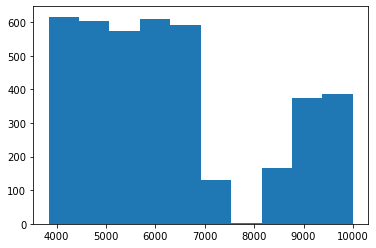

In [109]:
# Create a list of the SchoolId and show the distrobution of the SchoolIds
school_id_list = df['SchoolId'].tolist()
# sort the list
school_id_list.sort()

print(school_id_list)

import matplotlib.pyplot as plt

plt.hist(school_id_list, bins=10)

In [97]:
# descreibe the schoolid list
# df['SchoolId'].describe()

# Show a sample of the data

# df.sample(10)


In [110]:
# Drop any records where IsMiddleSchool is true
df = df[df['IsMiddleSchool'] == False]

# Remove the 'IsMiddleSchool' column
df = df.drop(columns=['IsMiddleSchool'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 3834 to 9999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SchoolId                            2731 non-null   int64  
 1   SportId                             2731 non-null   int64  
 2   PopularName                         2731 non-null   object 
 3   ProperName                          2731 non-null   object 
 4   NickName                            850 non-null    object 
 5   Colors                              970 non-null    object 
 6   LeaugeName                          606 non-null    object 
 7   LeaugeId                            2731 non-null   int64  
 8   HeadCoach                           0 non-null      float64
 9   PrimaryColorCode                    2009 non-null   object 
 10  ImagePath                           676 non-null    object 
 11  Classification                      737 

[3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 400

(array([615., 220.,   0., 533., 590.,  57.,   1., 137., 321., 257.]),
 array([3834. , 4450.5, 5067. , 5683.5, 6300. , 6916.5, 7533. , 8149.5,
        8766. , 9382.5, 9999. ]),
 <BarContainer object of 10 artists>)

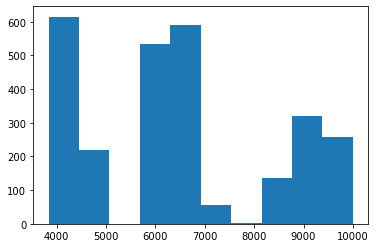

In [111]:
# Create a list of the SchoolId and show the distrobution of the SchoolIds
school_id_list = df['SchoolId'].tolist()
# sort the list
school_id_list.sort()

print(school_id_list)

import matplotlib.pyplot as plt

plt.hist(school_id_list, bins=10)

In [112]:
df.sample(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 3834 to 9999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SchoolId                            2731 non-null   int64  
 1   SportId                             2731 non-null   int64  
 2   PopularName                         2731 non-null   object 
 3   ProperName                          2731 non-null   object 
 4   NickName                            850 non-null    object 
 5   Colors                              970 non-null    object 
 6   LeaugeName                          606 non-null    object 
 7   LeaugeId                            2731 non-null   int64  
 8   HeadCoach                           0 non-null      float64
 9   PrimaryColorCode                    2009 non-null   object 
 10  ImagePath                           676 non-null    object 
 11  Classification                      737 

In [113]:
# keep just the rows with State = MI
df = df[df['State'] == 'MI']

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 3834 to 9945
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SchoolId                            1027 non-null   int64  
 1   SportId                             1027 non-null   int64  
 2   PopularName                         1027 non-null   object 
 3   ProperName                          1027 non-null   object 
 4   NickName                            819 non-null    object 
 5   Colors                              911 non-null    object 
 6   LeaugeName                          601 non-null    object 
 7   LeaugeId                            1027 non-null   int64  
 8   HeadCoach                           0 non-null      float64
 9   PrimaryColorCode                    835 non-null    object 
 10  ImagePath                           669 non-null    object 
 11  Classification                      732 

(array([607., 224.,   0.,   0.,   0.,  10.,   1.,  15.,  97.,  73.]),
 array([3834. , 4445.1, 5056.2, 5667.3, 6278.4, 6889.5, 7500.6, 8111.7,
        8722.8, 9333.9, 9945. ]),
 <BarContainer object of 10 artists>)

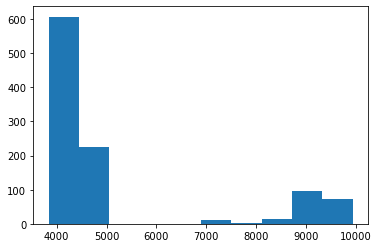

In [114]:
## Histogram of the school ids

# Create a list of the SchoolId and show the distrobution of the SchoolIds
school_id_list = df['SchoolId'].tolist()

# sort the list
school_id_list.sort()

import matplotlib.pyplot as plt

plt.hist(school_id_list, bins=10)

In [115]:
# Rename ClassificationCalculationSteps to ClassificationNotes
df = df.rename(columns={'ClassificationCalculationSteps': 'ClassificationNotes'})

df.sample(20)

,SchoolId,SportId,PopularName,ProperName,NickName,Colors,LeaugeName,LeaugeId,HeadCoach,PrimaryColorCode,...,VanityUrl,MapURL,WebSite,ClassificationNotes,ClassificationCalculationStepsHtml,SportSeasonId,EnrollmentData,TicketUrl,OldSchoolId,SchoolNameWithId
4462,4462,0,LeRoy Pine River,Pine River Area HS,Bucks,Green & White,Highland Conference,6923,NaN,#003366,...,pineriver,https://maps.google.com/maps?q=LeRoy Pine Rive...,https://www.pineriver.org/,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI10364,6956.0,LeRoy Pine River (6956)
3936,3936,0,Lansing Christian,Lansing Christian HS,Pilgrims,Black & Gold,NaN,0,NaN,#003366,...,lansingchristian,https://maps.google.com/maps?q=Lansing Christi...,http://www.lansingchristianschool.org/,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI4449,1858.0,Lansing Christian (1858)
4101,4101,0,Tecumseh,Tecumseh HS,Indians,Orange & Black,Southeastern Conference,6979,NaN,#003366,...,tecumseh,https://maps.google.com/maps?q=Tecumseh+760 Br...,http://www.tps.k12.mi.us/index_high.html,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI3685,3350.0,Tecumseh (3350)
4330,4330,0,Wakefield-Marenisco,Wakefield-Marenisco HS,Cardinals,Red/White/Blue,Copper Mountain Conference,9453,NaN,#003366,...,wakefield-marenisco,https://maps.google.com/maps?q=Wakefield-Maren...,http://www.wmschools.org,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI82752,5545.0,Wakefield-Marenisco (5545)
4514,4514,0,Ashley,Ashley HS,Bears,Royal Blue & Gold,Mid-State Activities Conference,6952,NaN,#003366,...,ashley,https://maps.google.com/maps?q=Ashley+104 New ...,http://www.ashleyschools.net/Sports.htm,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI4035,7500.0,Ashley (7500)
4015,4015,0,Byron Center,Byron Center HS,Bulldogs,Orange & Black,OK Conference,6963,NaN,#003366,...,byroncenter,https://maps.google.com/maps?q=Byron Center+85...,http://www.bcpsk12.net/hs/,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI10135,2542.0,Byron Center (2542)
8874,8874,0,Kalamazoo Reformed,Reformed Heritage Chrisitan School,Defenders,Blue & Orange,NaN,0,NaN,NaN,...,NaN,https://maps.google.com/maps?q=Kalamazoo Refor...,NaN,NaN,NaN,0,NaN,NaN,1020.0,Kalamazoo Reformed (1020)
4477,4477,0,Portland,Portland HS,Raiders,Cardinal Red & White,Capital Area Activities Conference,6899,NaN,#003366,...,portland,https://maps.google.com/maps?q=Portland+1100 I...,http://www.portlandk12.org/departments.htm,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI10168,7104.0,Portland (7104)
9492,9492,0,Dearborn Heights WISE Academy,WISE Academy HS,Lions,Navy Blue & Gold,NaN,0,NaN,NaN,...,dearbornheightswiseacademy,https://maps.google.com/maps?q=Dearborn Height...,NaN,NaN,NaN,0,NaN,NaN,1122.0,Dearborn Heights WISE Academy (1122)
3898,3898,0,Delton Kellogg,Delton Kellogg HS,Panthers,Maroon & White,Southwestern Athletic Conference,6984,NaN,#003366,...,deltonkellogg,https://maps.google.com/maps?q=Delton Kellogg+...,http://www.dkschools.org/?page_id=781,[],"<table class=""TabularData"" ><tbody><tr><th wid...",0,"[{'GradeDisplay': '9', 'GradeTypeCode': 9, 'Bo...",https://gofan.co/app/school/MI10207,1536.0,Delton Kellogg (1536)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049 entries, 3834 to 9999
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SchoolId                            4049 non-null   int64  
 1   SportId                             4049 non-null   int64  
 2   PopularName                         4049 non-null   object 
 3   ProperName                          4049 non-null   object 
 4   NickName                            922 non-null    object 
 5   Colors                              2104 non-null   object 
 6   LeaugeName                          606 non-null    object 
 7   LeaugeId                            4049 non-null   int64  
 8   HeadCoach                           0 non-null      float64
 9   PrimaryColorCode                    3117 non-null   object 
 10  ImagePath                           768 non-null    object 
 11  Classification                      737 

In [126]:
## Save this as MHSAA_School_Data.csv in the clean_tables folder

df.to_csv('TEMP/clean_tables/MHSAA_School_Data.csv', index=False)

In [104]:
# Show a sample of the data in the ClassificationCalculationStepsHtml column

# df['ClassificationCalculationStepsHtml'].sample(20)

# show a single record of the ClassificationCalculationStepsHtml column so I can tell if I need it
# df['ClassificationCalculationStepsHtml'][3834]

KeyError: 3834

In [116]:
def parse_html(row):
    try:
        # Parse the HTML content
        soup = BeautifulSoup(row, 'html.parser')
        table = soup.find_all('table')[0] 

        # Convert the table into a DataFrame
        df = pd.read_html(str(table), header=0)[0]

        # Extract the data for the '9', '10', '11', '12', and 'Other programs draw' grades
        grade_9 = df[df['Grade'] == '9'].iloc[0]
        grade_10 = df[df['Grade'] == '10'].iloc[0]
        grade_11 = df[df['Grade'] == '11'].iloc[0]
        grade_12 = df[df['Grade'] == '12'].iloc[0]
        other_programs = df[df['Grade'] == 'Other programs draw'].iloc[0]

        # Return a Series with the extracted data
        return pd.Series([
            grade_9['Boys'], grade_9['Girls'], grade_9['Total'],
            grade_10['Boys'], grade_10['Girls'], grade_10['Total'],
            grade_11['Boys'], grade_11['Girls'], grade_11['Total'],
            grade_12['Boys'], grade_12['Girls'], grade_12['Total'],
            other_programs['Boys'], other_programs['Girls'], other_programs['Total']
        ])
    except:
        # Return None values if the parsing fails
        return pd.Series([None] * 15)

# Apply the function to the column and create new columns for the extracted data
df[['Grade_9_Boys', 'Grade_9_Girls', 'Grade_9_Total',
    'Grade_10_Boys', 'Grade_10_Girls', 'Grade_10_Total',
    'Grade_11_Boys', 'Grade_11_Girls', 'Grade_11_Total',
    'Grade_12_Boys', 'Grade_12_Girls', 'Grade_12_Total',
    'Other_Boys', 'Other_Girls', 'Other_Total']] = df['ClassificationCalculationStepsHtml'].apply(parse_html)


In [ ]:
## Store the cleanedx data in a csv

df.to_csv(f"TEMP/clean_tables/clean_mhsaa_id_scrape.csv", index=False)

In [117]:
## Create a list of the SchoolId and store it to pass to the next script
school_id_list = df['SchoolId'].tolist()

In [118]:
## Scrape the MHSAA website using the list of school IDs

# Dependencies

import pandas as pd
import numpy as np
import requests
import json
import re
import time

## Create the 2 functions that perform the parse

# Function to parse game data
def parse_game_data(data, game):
    # Extract the team and league information
    team_name = data["Record"]["TeamName"]
    team_id = data["Record"]["SchoolSportTeamId"]
    league_name = data["League"]["Name"]

    # Extract the opponentId and opponentName
    opponent_id = game["Opponents"][0]["SportTeamId"] if game["Opponents"] else None
    opponent_name = game["Opponents"][0]["PopularName"] if game["Opponents"] else None

    # Extract the gameDate and gameTime
    game_date = game["StartDate"]
    game_time = game["TimeText"]

    # Extract homeOrAway
    home_or_away = game["HomeAwayCode"]

    # Extract location info
    location = game["ContestLocationLink"]

    # Extract teamScore, opponentScore, and notes
    team_score = None
    opponent_score = None
    notes = None
    score_text = game["ScoreText"]
    if score_text:
        # Use regular expression to find scores and notes
        match = re.match(r"(\d+)-(\d+)(.*)", score_text)
        if match:
            team_score, opponent_score, notes = match.groups()
            # Convert scores to integers
            team_score = int(team_score)
            opponent_score = int(opponent_score)
            # Trim whitespace from notes
            notes = notes.strip()

    # Extract additional info
    contest_type = game.get("ContestType")
    season_type = game.get("SeasonType")
    post_season_info = game.get("PostSeasonInfo")
    tournament_info = game.get("TournamentInfo")
    tournament_name = game.get("TournamentName")
    tournament_type = game.get("TournamentType")
    contest_name = game.get("ContestName")
    season_type_code = game.get("SeasonTypeCode")

    return {
        "teamName": team_name,
        "teamId": team_id,
        "leagueName": league_name,
        "opponentName": opponent_name,
        "opponentId": opponent_id,
        "gameDate": game_date,
        "gameTime": game_time,
        "homeOrAway": home_or_away,
        "location": location,
        "teamScore": team_score,
        "opponentScore": opponent_score,
        "notes": notes,
        "contestType": contest_type,
        "seasonType": season_type,
        "postSeasonInfo": post_season_info,
        "tournamentInfo": tournament_info,
        "tournamentName": tournament_name,
        "tournamentType": tournament_type,
        "contestName": contest_name,
        "seasonTypeCode": season_type_code
    }


def initialize_parsing(base_url, school_ids, url_end):
    # Initialize an empty list to hold the parsed data
    parsed_data = []

    # Loop over the school_ids
    for school_id in school_ids:
        # Convert the id to a string
        id_str = str(school_id)
        # Build the URL
        full_url = base_url + id_str + url_end
        # Make the request
        response = requests.get(full_url)

        # Only proceed if the response status code is 200 (HTTP OK)
        if response.status_code == 200:
            # Convert the response to json
            data = response.json()

            # Check to see if the response is valid. If it is, parse the game data
            if 'Contests' in data and data['Contests']:  # Check if 'Contests' key exists and its value is not empty
                for game in data['Contests']:
                    parsed_data.append(parse_game_data(data, game))

    return parsed_data


In [119]:
import pandas as pd
from tqdm import tqdm
import time
from datetime import datetime

## Target years to scrape
years = [2021, 2020, 2018, 2017,  2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009 ]

## url builder
base_url = 'https://my.mhsaa.com/DesktopModules/MHSAA-Async-SportTeamSchedule/Endpoint.ashx?&method=schedules&orgID='
mid_url = '&sportTypeCode=BA&gender=M&level=V&year='
end_url = '&userid=-1'

# List of Valid school Ids identified above
# school_id_list 

# Initialize a timer for the total execution time
total_start_time = time.time()

# Create a dictionary to store dataframes
df_dict = {}

# Loop over the years
for year in years:
    # Initialize a timer for the year's execution time
    year_start_time = time.time()

    # Initialize the parsing for the given year and team ID range
    parsed_data = initialize_parsing(base_url, school_id_list, mid_url + str(year) + end_url)

    # store the parsed data as DataFrame
    df = pd.DataFrame(parsed_data)

    # Store a copy of the DataFrame in the dictionary
    df_dict[year] = df.copy()
   
    # Generate timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

    # Save the DataFrame to a CSV file in /TEMP/ directory, using year+1 in filename and current timestamp
    df.to_csv(f"TEMP/_{timestamp}_{year+1}.csv", index=False)

    # Print the year's execution time in minutes and seconds
    print(f"Year {year+1} took {int((time.time() - year_start_time)/60)} minutes and {int((time.time() - year_start_time)%60)} seconds")
    
    # print the number of valid records for the year
    # print(f"Number of valid records: {len(df[df['teamName'].notnull()])}")
    # print total number of contests for the year
    print(f"Total number of contests: {len(df)}")

# Print the total execution time
print(f"Total time taken: {int((time.time() - total_start_time)/60)} minutes and {int((time.time() - total_start_time)%60)} seconds")




Year 2022 took 7 minutes and 30 seconds
Total number of contests: 21119
Year 2020 took 5 minutes and 59 seconds
Total number of contests: 12686
Year 2019 took 7 minutes and 34 seconds
Total number of contests: 19195
Year 2018 took 7 minutes and 38 seconds
Total number of contests: 18198
Year 2017 took 7 minutes and 24 seconds
Total number of contests: 18828
Year 2016 took 6 minutes and 53 seconds
Total number of contests: 16945
Year 2015 took 7 minutes and 17 seconds
Total number of contests: 17967
Year 2014 took 6 minutes and 53 seconds
Total number of contests: 17203
Year 2013 took 6 minutes and 36 seconds
Total number of contests: 14334
Year 2012 took 6 minutes and 25 seconds
Total number of contests: 11902
Year 2011 took 5 minutes and 52 seconds
Total number of contests: 7410
Year 2010 took 5 minutes and 26 seconds
Total number of contests: 4830
Total time taken: 81 minutes and 33 seconds


In [121]:
## Run the same code for a new list of years

year_list = [2022, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,1999]

## url builder
base_url = 'https://my.mhsaa.com/DesktopModules/MHSAA-Async-SportTeamSchedule/Endpoint.ashx?&method=schedules&orgID='
mid_url = '&sportTypeCode=BA&gender=M&level=V&year='
end_url = '&userid=-1'

# List of Valid school Ids identified above
# school_id_list 

# Initialize a timer for the total execution time
total_start_time = time.time()

# Create a dictionary to store dataframes
df_dict = {}

# Loop over the years
for year in year_list:
    # Initialize a timer for the year's execution time
    year_start_time = time.time()

    # Initialize the parsing for the given year and team ID range
    parsed_data = initialize_parsing(base_url, school_id_list, mid_url + str(year) + end_url)

    # store the parsed data as DataFrame
    df = pd.DataFrame(parsed_data)

    # Store a copy of the DataFrame in the dictionary
    df_dict[year] = df.copy()
   
    # Generate timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

    # Save the DataFrame to a CSV file in /TEMP/ directory, using year+1 in filename and current timestamp
    df.to_csv(f"TEMP/_{timestamp}_{year+1}.csv", index=False)

    # Print the year's execution time in minutes and seconds
    print(f"Year {year+1} took {int((time.time() - year_start_time)/60)} minutes and {int((time.time() - year_start_time)%60)} seconds")
    
    # print the number of valid records for the year
    # print(f"Number of valid records: {len(df[df['teamName'].notnull()])}")
    # print total number of contests for the year
    print(f"Total number of contests: {len(df)}")

# Print the total execution time
print(f"Total time taken: {int((time.time() - total_start_time)/60)} minutes and {int((time.time() - total_start_time)%60)} seconds")
    

Year 2023 took 7 minutes and 57 seconds
Total number of contests: 22176
Year 2009 took 5 minutes and 13 seconds
Total number of contests: 0
Year 2008 took 4 minutes and 58 seconds
Total number of contests: 0
Year 2007 took 5 minutes and 0 seconds
Total number of contests: 0
Year 2006 took 4 minutes and 58 seconds
Total number of contests: 0
Year 2005 took 4 minutes and 55 seconds
Total number of contests: 0
Year 2004 took 4 minutes and 53 seconds
Total number of contests: 0
Year 2003 took 4 minutes and 53 seconds
Total number of contests: 0
Year 2002 took 4 minutes and 46 seconds
Total number of contests: 0
Year 2001 took 4 minutes and 43 seconds
Total number of contests: 2
Year 2000 took 4 minutes and 55 seconds
Total number of contests: 0
Total time taken: 57 minutes and 15 seconds


In [ ]:
df.sample(20)

,SchoolId,SportId,PopularName,ProperName,NickName,Colors,LeaugeName,LeaugeId,HeadCoach,PrimaryColorCode,...,Grade_10_Total,Grade_11_Boys,Grade_11_Girls,Grade_11_Total,Grade_12_Boys,Grade_12_Girls,Grade_12_Total,Other_Boys,Other_Girls,Other_Total
4042,4042,0,Lansing Eastern,Eastern HS,Quakers,Blue & Gold,Capital Area Activities Conference,6899,NaN,#003366,...,246.0,82.0,90.0,172.0,56.0,62.0,118.0,28.0,14.0,42.0
8950,8950,0,Detroit East English,East English Village Preparatory Acad,Bulldogs,Maize & Blue,Detroit Public Schools League,6912,NaN,NaN,...,208.0,104.0,91.0,195.0,72.0,80.0,152.0,0.0,0.0,0.0
4545,4545,0,Grosse Pointe North,Grosse Pointe North HS,Norsemen,Green & Gold,Macomb Area Conference,6940,NaN,#003366,...,287.0,138.0,142.0,280.0,154.0,145.0,299.0,0.0,0.0,0.0
4325,4325,0,Wyoming Lee,Lee HS,Legends,Navy Blue & Vegas Gold,Alliance League,6894,NaN,#003366,...,129.0,55.0,62.0,117.0,45.0,38.0,83.0,55.0,55.0,110.0
4426,4426,0,Grandville,Grandville HS,Bulldogs,Maroon & White,OK Conference,6963,NaN,#003366,...,443.0,240.0,229.0,469.0,225.0,214.0,439.0,0.0,0.0,0.0
3979,3979,0,International Academy of Flint,International Academy of Flint,Phoenix,Black/Maroon/White,NaN,0,NaN,#003366,...,61.0,13.0,23.0,36.0,18.0,19.0,37.0,0.0,0.0,0.0
4156,4156,0,Detroit Cleveland Intermediate,Cleveland Intermediate HS,Trojans,Green & White,NaN,0,NaN,#003366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3915,3915,0,Centreville,Centreville HS,Bulldogs,Blue & Gold,Southwest 10 Conference,9489,NaN,#003366,...,74.0,39.0,22.0,61.0,41.0,23.0,64.0,0.0,0.0,0.0
9493,9493,0,Grand Rapids Homeschoolers - Spartans,Grand Rapids Homeschoolers - Spartans,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3945,3945,0,Ecorse,Ecorse HS,Raiders,Red & White,Michigan Metro Athletic Conference,8890,NaN,#003366,...,69.0,37.0,22.0,59.0,24.0,22.0,46.0,62.0,72.0,134.0


### BREAK


In [ ]:
# # Load raw data from Temp file
# df = pd.read_csv('school_data_scrape.csv')

# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SchoolId                            1001 non-null   int64  
 1   SportId                             1001 non-null   int64  
 2   PopularName                         167 non-null    object 
 3   ProperName                          167 non-null    object 
 4   NickName                            154 non-null    object 
 5   Colors                              166 non-null    object 
 6   LeaugeName                          113 non-null    object 
 7   LeaugeId                            1001 non-null   int64  
 8   HeadCoach                           0 non-null      float64
 9   PrimaryColorCode                    165 non-null    object 
 10  ImagePath                           134 non-null    object 
 11  Classification                      143 non

In [ ]:
# # Drop the rows with empty data in 'PopularName' column
# df = df.dropna(subset=['PopularName'])

# # Show Length of DataFrame
# print(len(df))

167
